In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Data Analysis of UFO sightings

In [2]:
ufo = pd.read_csv('ufo_sightings_dirty.csv', dtype={'duration (seconds)': 'str'})
ufo.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611


In [3]:
# Break apart datetime to be time, day, month, year
ufo[['Date', 'Time']] = ufo['datetime'].str.split(' ',expand=True)
ufo[['Year', 'Month', 'Day']] = ufo['Date'].str.split('-', expand =True)
# change capitization of addresses to proper format
ufo['city'] = ufo['city'].str.title()
ufo['state'] = ufo['state'].str.upper()
ufo['country'] = ufo['country'].str.upper()
# Convert columns to proper formatting
ufo.columns = ufo.columns.str.strip()
ufo['date posted'] = pd.to_datetime(ufo['date posted'])
ufo['duration (seconds)'] = pd.to_numeric(ufo['duration (seconds)'], errors='coerce')
ufo['longitude'] = pd.to_numeric(ufo['longitude'], errors='coerce')
ufo['latitude'] = pd.to_numeric(ufo['latitude'], errors='coerce')
ufo['Year'] = pd.to_numeric(ufo['Year'], errors='coerce')
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime              80332 non-null  object        
 1   city                  80332 non-null  object        
 2   state                 74535 non-null  object        
 3   country               70662 non-null  object        
 4   shape                 78400 non-null  object        
 5   duration (seconds)    80329 non-null  float64       
 6   duration (hours/min)  80332 non-null  object        
 7   comments              80317 non-null  object        
 8   date posted           80332 non-null  datetime64[ns]
 9   latitude              80332 non-null  float64       
 10  longitude             80332 non-null  float64       
 11  Date                  80332 non-null  object        
 12  Time                  80332 non-null  object        
 13  Year            

In [4]:
#Calculate total null values
print("--------------\nMissing values: \n{}".format(pd.isnull(ufo).sum()))

--------------
Missing values: 
datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         3
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
Date                       0
Time                       0
Year                       0
Month                      0
Day                        0
dtype: int64


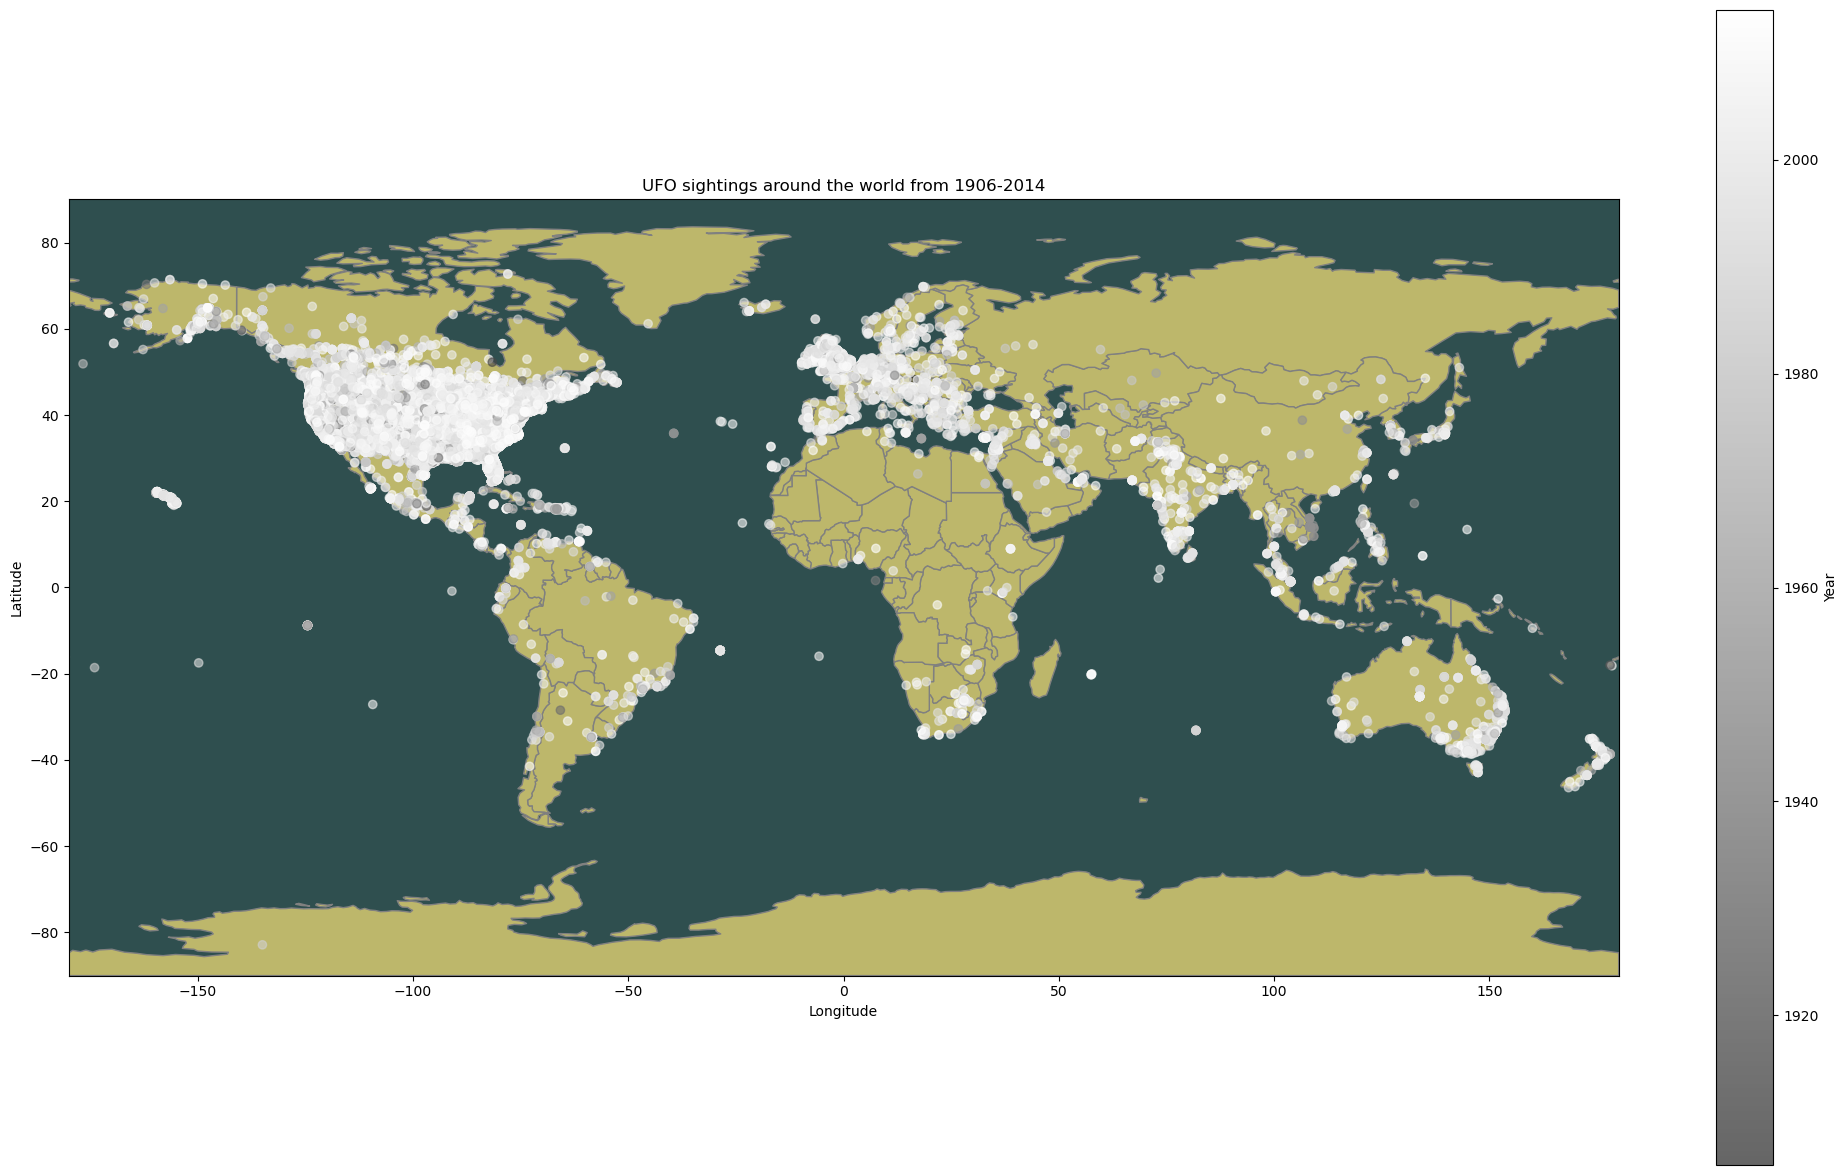

In [39]:
# Pull world map data from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Creating axes and plotting world map and increasing size
fig, ax = plt.subplots(figsize=(25, 15))
ax.set_facecolor('darkslategray')
world.plot(color='darkkhaki', ax=ax, edgecolor='grey')

x = ufo['longitude']
y = ufo['latitude']
z = ufo['Year']

#PiYG
plt.scatter(x, y, c=z, alpha=0.6, vmin=1906, vmax=2014, cmap='gray')
plt.colorbar(label='Year')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.title ('UFO sightings around the world from 1906-2014')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Data Analysis of Meteorite Landings

In [6]:
meteorite = pd.read_csv('meteorite_landings.csv')
meteorite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [7]:
# Remove rows where GeoLocation or year is missing

meteorite = meteorite[meteorite['GeoLocation'].notnull() & meteorite['year'].notnull()]

#Convert year to interger and drop anything not between 1906-2014 (ufo df)

meteorite['year'] = meteorite['year'].astype('int')
meteorite = meteorite.loc[((meteorite['year'] > 1906) & (meteorite['year'] < 2014))]
meteorite['year'].unique()

array([1951, 1952, 1976, 1919, 1949, 1930, 1920, 1974, 1925, 1959, 1981,
       1957, 2001, 2002, 1969, 2008, 1977, 1939, 1942, 1971, 1984, 1914,
       1954, 1932, 1950, 2009, 1923, 1933, 1945, 1908, 1968, 1938, 1934,
       1929, 1922, 1907, 1993, 1913, 1910, 1965, 2006, 1994, 2012, 1989,
       1916, 1961, 1937, 2004, 1943, 1924, 1921, 1940, 1999, 1941, 1909,
       1962, 2003, 2011, 1956, 1960, 2007, 1990, 1946, 1991, 1964, 1973,
       1988, 1998, 2013, 1966, 1978, 1979, 1917, 1936, 1911, 1967, 1995,
       1970, 1947, 1996, 1944, 2000, 1918, 1983, 1980, 1972, 1982, 1912,
       1963, 2010, 1975, 1928, 1926, 1997, 1955, 1986, 1931, 1985, 1987,
       1935, 1927, 1948, 1992, 1953, 1915, 1958, 2005])

In [62]:
# Split Geolocation into long/lat columns so that it can be plotted in geopandas then change formatting

meteorite['longitude'] = meteorite['GeoLocation'].str.split(', ').str[0].str[1:]
meteorite['latitude'] = meteorite['GeoLocation'].str.split(', ').str[1].str[:-2]
meteorite['longitude'] = pd.to_numeric(meteorite['longitude'], errors='coerce')
meteorite['latitude'] = pd.to_numeric(meteorite['latitude'], errors='coerce')
meteorite['year'] = pd.to_numeric(meteorite['year'], errors='coerce')
meteorite.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,longitude,latitude
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.183330, 10.233330)",56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.216670, -113.000000)",54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.883330, -99.900000)",16.88333,-99.90000
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919,32.10000,71.80000,"(32.100000, 71.800000)",32.10000,71.80000
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,1949,44.83333,95.16667,"(44.833330, 95.166670)",44.83333,95.16667


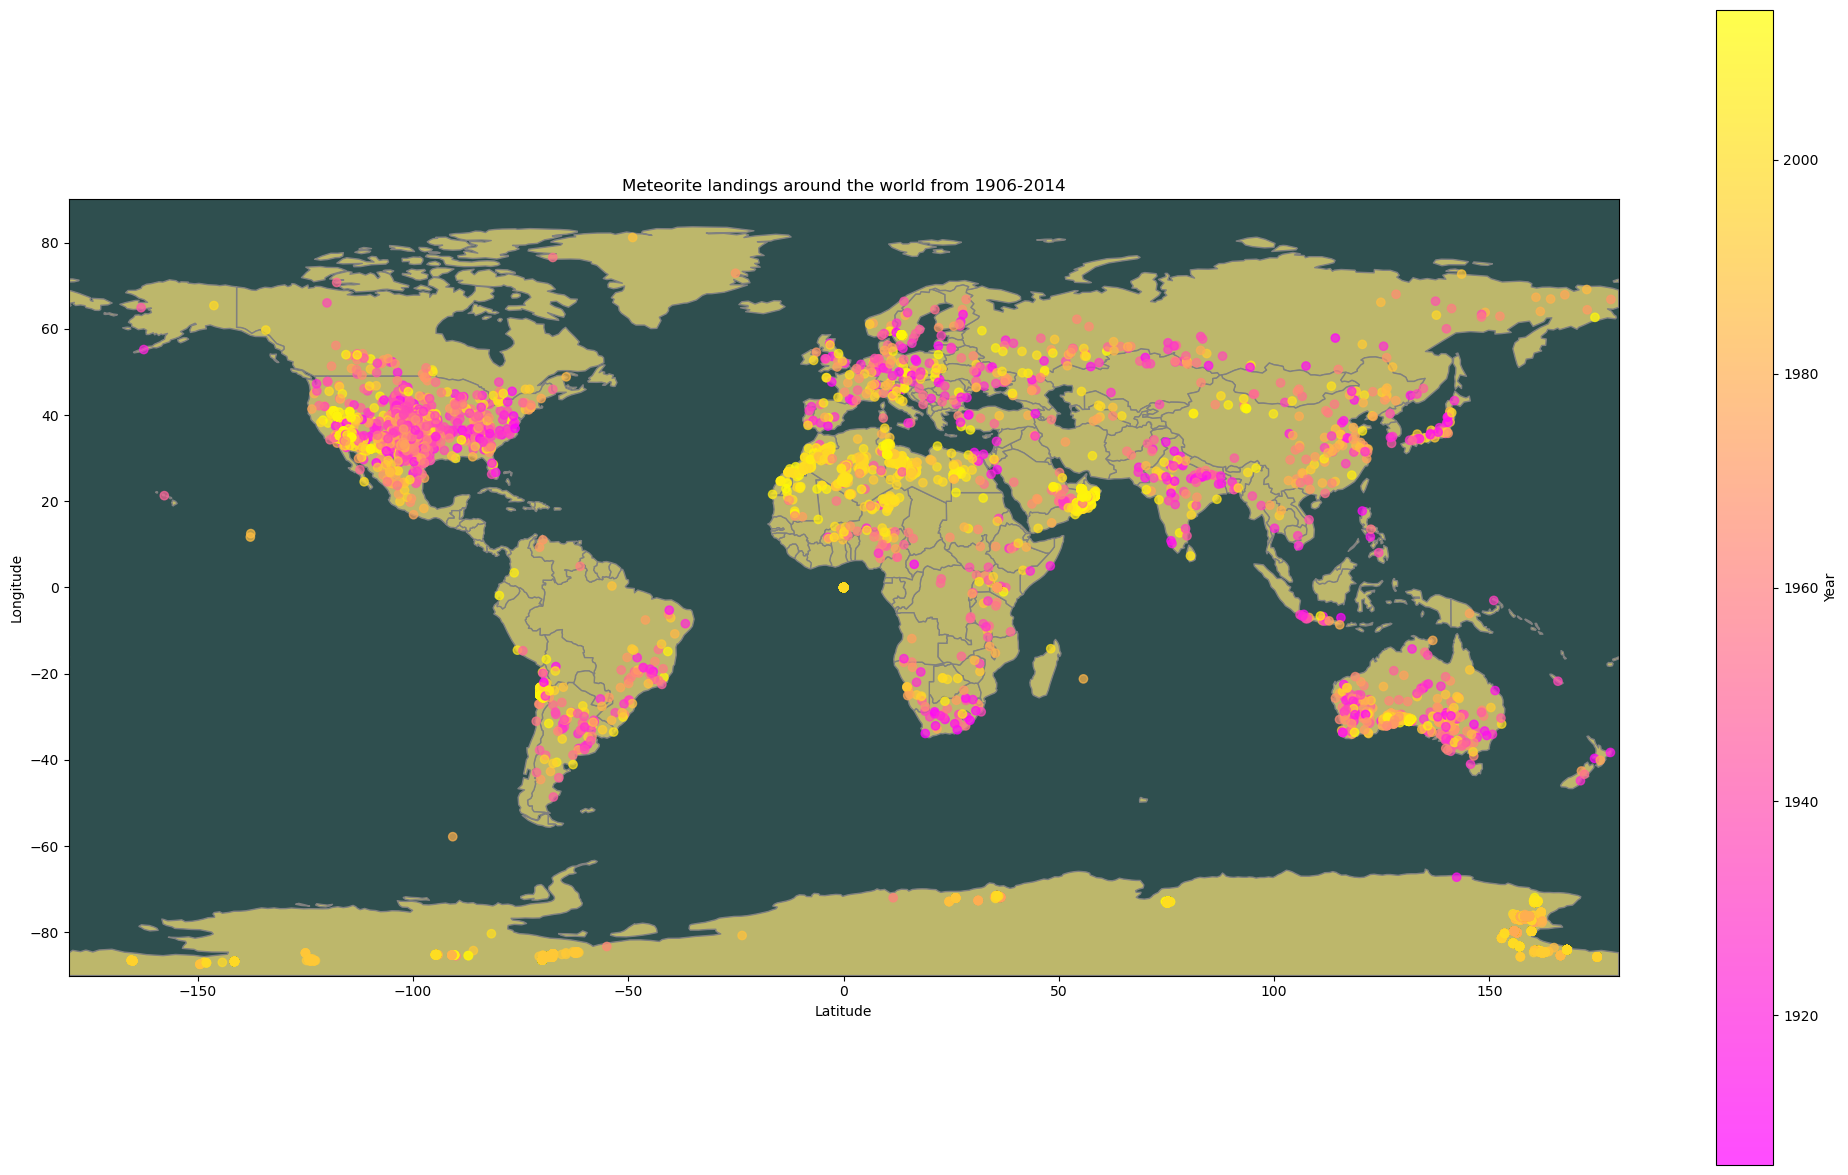

In [60]:
# Look at locations on a map
fig, ax = plt.subplots(figsize=(25, 15))
ax.set_facecolor('darkslategray')
world.plot(color="darkkhaki", ax=ax, edgecolor='grey')

x = meteorite['latitude']
y = meteorite['longitude']
z = meteorite['year']

plt.scatter(x, y, c=z, alpha=0.7, vmin=1906, vmax=2014, cmap='spring')
plt.colorbar(label='Year')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.title ('Meteorite landings around the world from 1906-2014')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

# Compare UFO Sightings and Meteorite Landings

In [10]:
from math import radians, cos, sin, asin, acos, sqrt, pi
from geopy import distance
from geopy.geocoders import Nominatim
import osmnx as ox
import networkx as nx

In [11]:
#Joining two dataframes

#df = pd.concat([ufo[['latitude', 'longitude']], meteorite[['latitude', 'longitude']]], axis=1, keys= ['ufo', 'meteorite'])
#mask = ((abs(ufo['latitude'] - meteorite['latitude']) < 0.5)) & ((abs(ufo['longitude'] - meteorite['longitude']) < 0.5))
#df.loc[mask, 'same_place'] = 'Yes'

In [12]:
import geopy.distance

def connected_to_meteorite(longitude, latitude, year):
    # Create DF to check if long/lat of any meteorite landings are close to each other and within the same year
    connected_meteorites = meteorite[(meteorite['year'] == year) & (abs(meteorite['latitude'] - latitude) < 10) &
                                     (abs(meteorite['longitude'] - longitude) < 10)]
    if len(connected_meteorites) > 0:
        connected_meteorites['sightings'] = connected_meteorites.apply(lambda row: within_human_sight(latitude, longitude, row.latitude, row.longitude), axis = 1)
        if connected_meteorites['sightings'].sum() > 0:
            return 1
        
    return 0

# Check long/lat distances to see if the ufo sighting was within 1100km (distance of human sight range) 
# of where meteorite landed
def within_human_sight(lat1, lon1, lat2, lon2):
    try:
        distance = geopy.distance.geodesic((lat1, lon1), (lat2, lon2)).km
        if distance < 1100:
            return 1
    except Exception as e: 
        print(e)
        
    return 0

# Create new column to place findings
ufo['similar_occurance'] = ufo.apply(lambda row: connected_to_meteorite(row.longitude, row.latitude, row.Year), axis=1)
ufo

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Date,Time,Year,Month,Day,similar_occurance
0,1949-10-10 20:30:00,San Marcos,TX,US,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111,1949-10-10,20:30:00,1949,10,10,0
1,1949-10-10 21:00:00,Lackland Afb,TX,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082,1949-10-10,21:00:00,1949,10,10,0
2,1955-10-10 17:00:00,Chester (Uk/England),NaN,GB,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667,1955-10-10,17:00:00,1955,10,10,0
3,1956-10-10 21:00:00,Edna,TX,US,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833,1956-10-10,21:00:00,1956,10,10,0
4,1960-10-10 20:00:00,Kaneohe,HI,US,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611,1960-10-10,20:00:00,1960,10,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,Nashville,TN,US,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444,2013-09-09,21:15:00,2013,09,09,0
80328,2013-09-09 22:00:00,Boise,ID,US,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500,2013-09-09,22:00:00,2013,09,09,0
80329,2013-09-09 22:00:00,Napa,CA,US,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444,2013-09-09,22:00:00,2013,09,09,0
80330,2013-09-09 22:20:00,Vienna,VA,US,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556,2013-09-09,22:20:00,2013,09,09,0


In [13]:
# Remove excess columns and sum total occurances of meteorite occurances that could explain UFO sightings

ufo_meteorite = ufo.drop(columns = ['duration (seconds)', 'duration (hours/min)', 'comments'])
print('The total meteorite landings that occured around a sighting:', ufo_meteorite['similar_occurance'].sum())
ufo_meteorite.head()

The total meteorite landings that occured around a sighting: 2565


,datetime,city,state,country,shape,date posted,latitude,longitude,Date,Time,Year,Month,Day,similar_occurance
0,1949-10-10 20:30:00,San Marcos,TX,US,cylinder,2004-04-27,29.883056,-97.941111,1949-10-10,20:30:00,1949,10,10,0
1,1949-10-10 21:00:00,Lackland Afb,TX,NaN,light,2005-12-16,29.384210,-98.581082,1949-10-10,21:00:00,1949,10,10,0
2,1955-10-10 17:00:00,Chester (Uk/England),NaN,GB,circle,2008-01-21,53.200000,-2.916667,1955-10-10,17:00:00,1955,10,10,0
3,1956-10-10 21:00:00,Edna,TX,US,circle,2004-01-17,28.978333,-96.645833,1956-10-10,21:00:00,1956,10,10,0
4,1960-10-10 20:00:00,Kaneohe,HI,US,light,2004-01-22,21.418056,-157.803611,1960-10-10,20:00:00,1960,10,10,0


In [14]:
# Only show records where meteorite could match UFO sighting report

indexMeteorite = ufo_meteorite[ufo_meteorite['similar_occurance'] == 0].index
ufo_meteorite.drop(indexMeteorite, inplace=True)
ufo_meteorite

,datetime,city,state,country,shape,date posted,latitude,longitude,Date,Time,Year,Month,Day,similar_occurance
17,1973-10-10 19:00:00,Niantic,CT,US,disk,2003-09-24,41.325278,-72.193611,1973-10-10,19:00:00,1973,10,10,1
18,1973-10-10 23:00:00,Bermuda Nas,NaN,NaN,light,2002-01-11,32.364167,-64.678611,1973-10-10,23:00:00,1973,10,10,1
19,1974-10-10 19:30:00,Hudson,MA,US,other,1999-08-10,42.391667,-71.566667,1974-10-10,19:30:00,1974,10,10,1
22,1975-10-10 17:00:00,North Charleston,SC,US,light,2008-02-14,32.854444,-79.975000,1975-10-10,17:00:00,1975,10,10,1
28,1979-10-10 00:00:00,Poughkeepsie,NY,US,chevron,2005-04-16,41.700278,-73.921389,1979-10-10,00:00:00,1979,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80134,2000-09-09 03:30:00,Coatesville,PA,US,light,2000-09-17,39.983056,-75.824167,2000-09-09,03:30:00,2000,09,09,1
80136,2000-09-09 03:30:00,Mount Laurel,NJ,US,fireball,2000-09-17,39.933889,-74.891389,2000-09-09,03:30:00,2000,09,09,1
80137,2000-09-09 03:30:00,Philadelphia,PA,US,changing,2000-09-17,39.952222,-75.164167,2000-09-09,03:30:00,2000,09,09,1
80139,2000-09-09 21:30:00,Hermitage,PA,US,triangle,2000-09-17,41.233333,-80.448889,2000-09-09,21:30:00,2000,09,09,1


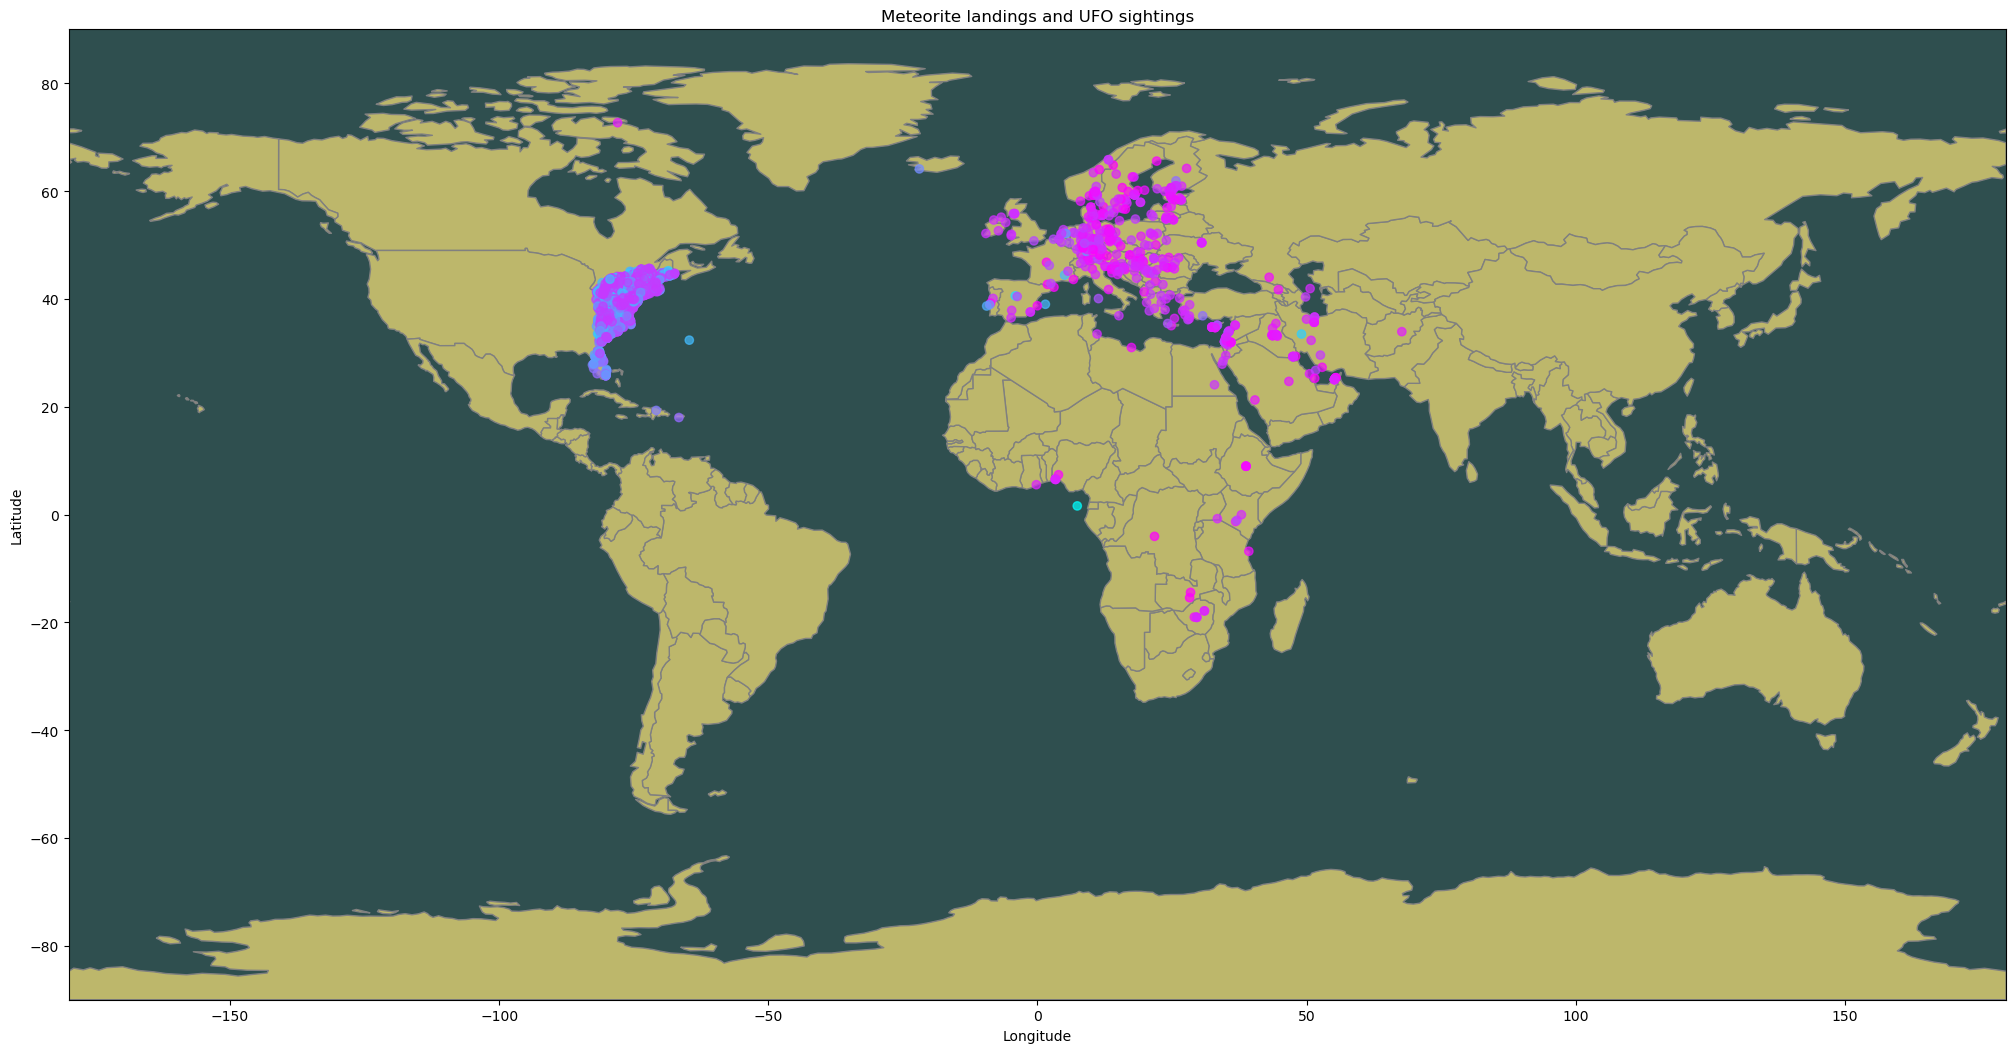

In [67]:
# Plotting UFO sightings that are connected to meteorites with geopandas

fig, ax = plt.subplots(figsize=(25, 15))
ax.set_facecolor('darkslategray')
world.plot(color='darkkhaki', ax=ax, edgecolor='grey')

y = ufo_meteorite['latitude']
x = ufo_meteorite['longitude']
z = ufo_meteorite['Year']

plt.scatter(x, y, c=z, alpha=0.7, cmap='cool')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.title ('Meteorite landings and UFO sightings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [16]:
# What is the percentage of meteroite landings that could explain ufo sightings?

ufo_meteorite['similar_occurance'].sum() / len(ufo) * 100

3.1929990539262065